### Installing of Requirements (only run this if you haven't installed the necessary libraries found in requirements.txt)

In [1]:
# !pip install -r requirements.txt

In [2]:
import geopandas as  gpd
import os
import pandas as pd

Todo
- convert all geojson files into 1 geodataframe 
- data cleaning
- clip the inputs onto the map layer, similar to getting the intersection between the points and the map layer
- return the output onto a file
- write documentation in this notebook if necessary

### Reading the Paranaque Images and Saving a compiled GEOJSON file of the images 

In [3]:
# Accessing the data of Paranque images
paranaque_json_dir = 'data/paranaque'

os.chdir(paranaque_json_dir)

In [4]:
gdf_list = []
geojson_Count = 0

In [5]:
for file in os.listdir():
    if file.endswith('.geojson'):
        gdf = gpd.read_file(file)
        geojson_Count += 1
        
        # filter out null json files
        if '"features": []' not in gdf:
            gdf = gpd.read_file(file)
            gdf_list.append(gdf)
            
            
        # gdf_list.append(gdf)

In [6]:
# Run this if you want to view the compiled json

# gdf_list

### Saving the compiled images into a GeoDataFrame in a GEOJSON file

In [7]:
# output_dir = 'output_geojson'
# os.makedirs(output_dir, exist_ok=True)

# merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
# output_filename = 'output_geojson/merged_paranaque.geojson'
# merged_gdf.to_file(output_filename, driver='GeoJSON')
# print(f"Saved {output_filename}")

#the file is found in a folder that can be viewed in the data/paranaque folder as "output_geojson"

In [8]:
%pip install imagehash

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import os
import pandas as pd
import geopandas as gpd
from PIL import Image
import imagehash

def hash_image(file_path):
    """
    Compute a hash for an image file.
    """
    with Image.open(file_path) as img:
        return imagehash.average_hash(img)

def filter_similar_images(gdf_list):
    """
    Filter out similar images based on their hash.
    """
    filtered_gdf_list = []
    hash_set = set()

    for gdf in gdf_list:
        file_path = gdf['thumb_2048_url']  # Replace 'your_image_column' with the column containing image file paths
        file_hash = hash_image(file_path)

        if file_hash not in hash_set:
            hash_set.add(file_hash)
            filtered_gdf_list.append(gdf)

    return filtered_gdf_list

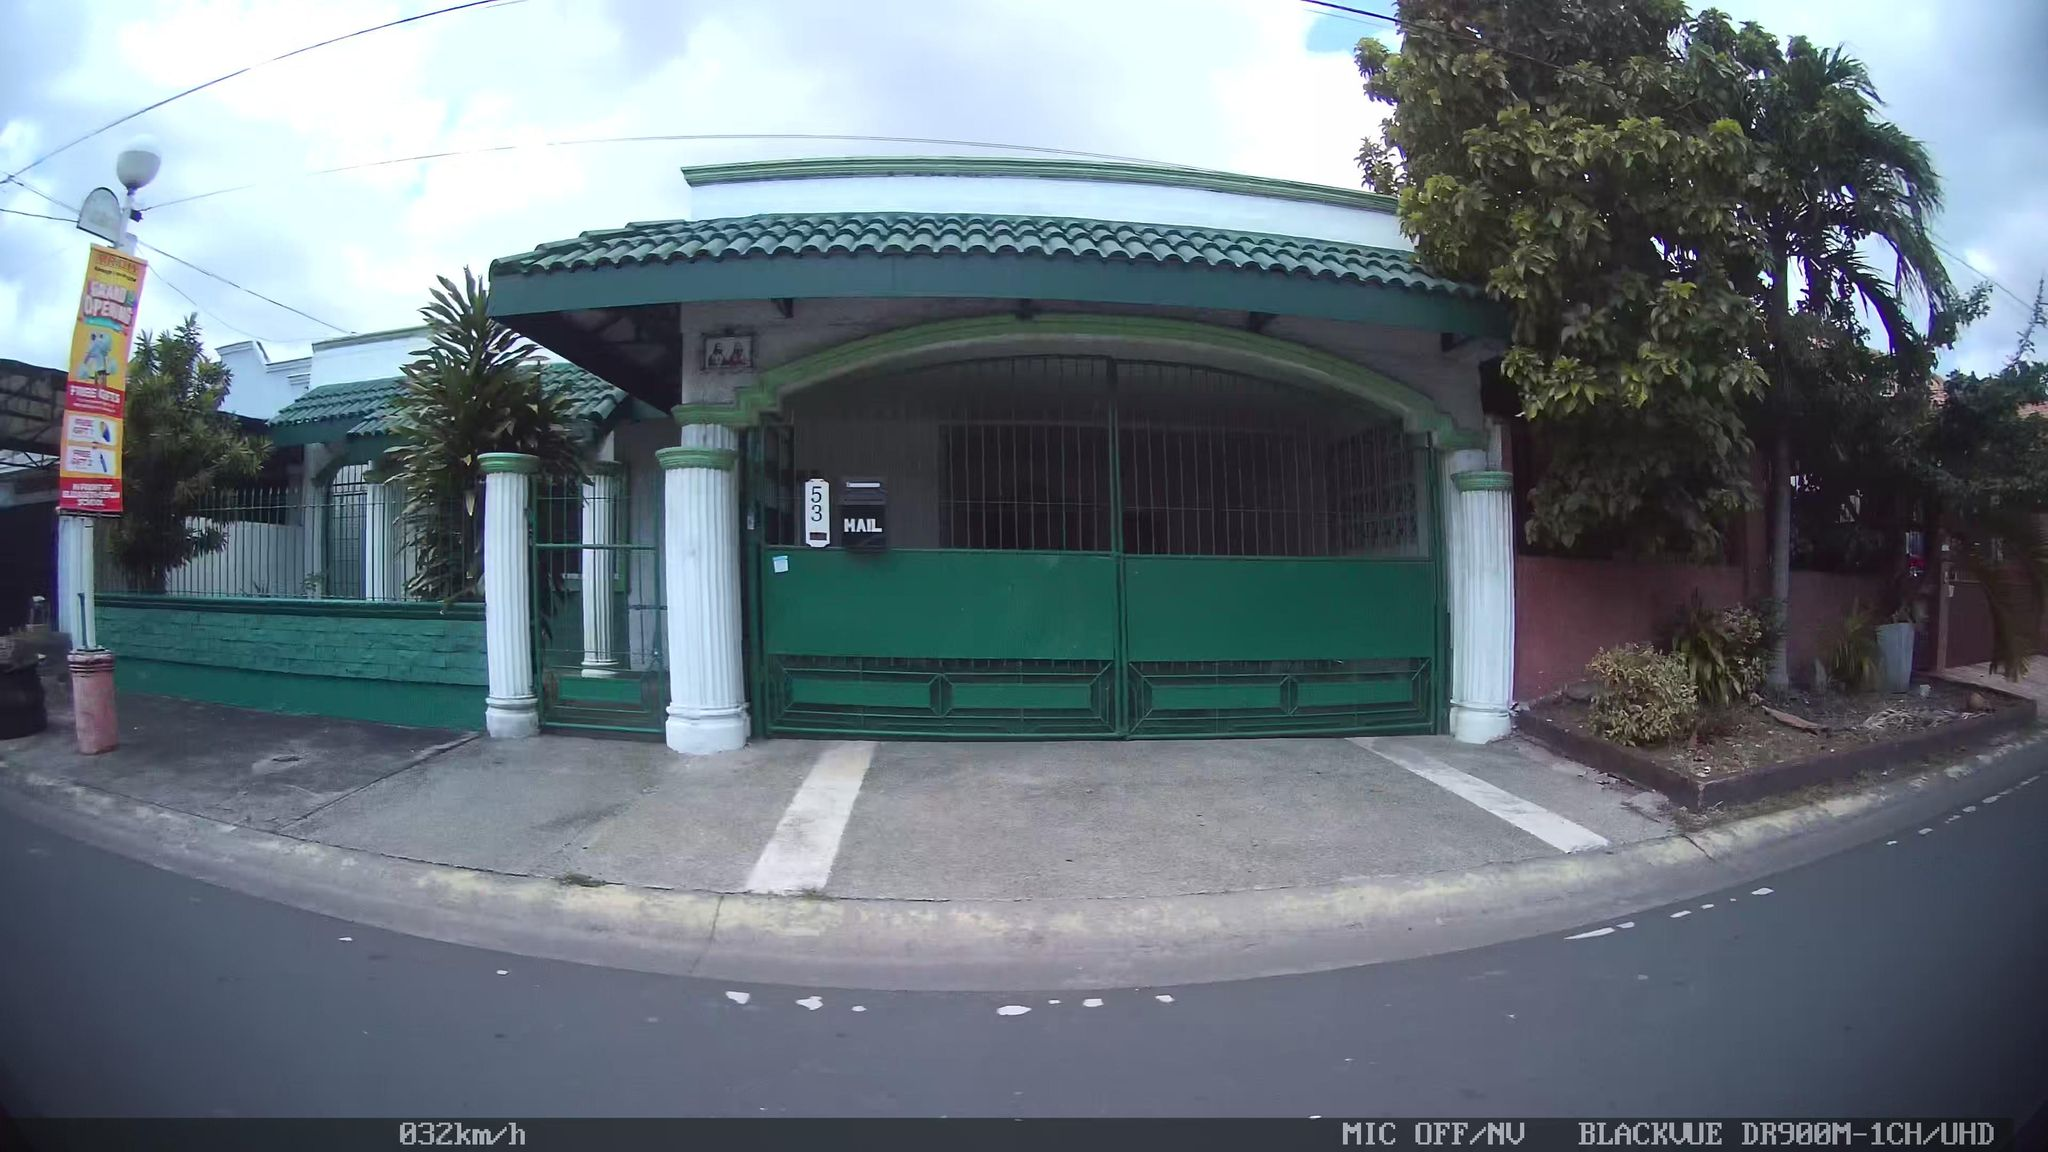

fdfdc000207e7c00
ffff4101100e0000
15


In [13]:
from PIL import Image
import requests
from io import BytesIO

url145_2 = "https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t6/An9cxUlW_AayC--U1c1tXtigRWBRepZES4Saq31GZPPfI_1kASse71rEi1aHOXJg7PgemaXitnPVZj7-Gu3DCgPYpqEpwxl8xyqfFQExorMuMYfThwfTk1o7hkNvHVDmUNNzmOxxMihFXrV1DWZbUQ?stp=s2048x1152&ccb=10-5&oh=00_AfABtAA7BtX7l74UEQ9ZLtj1PaNJfoLMuund6A1JT3mVIQ&oe=65B3421E&_nc_sid=201bca"
url145_x = "https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t6/An_KYEqGfSXn0q4WRrqa5yKMBoBGH2ASguDbtT_RWVlbONyd3wa2GQn_D2n5o1hEzzh3HJjCCRpBnakmbUbOvOxrjKhCTQD0j14SK0uibENIo5H0O_Ma6KpP2rF1TbgEreu3R2Ukib0Vr9bJds2L-g?stp=s2048x1152&ccb=10-5&oh=00_AfBb33hgHaxhlRnrovVaeukq6ZdKdcY_6Meb-OI7UGSYzQ&oe=65B33919&_nc_sid=201bca"

response = requests.get(url145_2)
img = Image.open(BytesIO(response.content))
display(img)

response10 = requests.get(url145_x)
img10 = Image.open(BytesIO(response10.content))

hashing = imagehash.average_hash(img)
hashing10 = imagehash.average_hash(img10)

print(hashing)
print(hashing10)
print(abs(hashing-hashing10))

In [ ]:
filtered_gdf_list = filter_similar_images(gdf_list)

output_dir = 'output_geojson'
os.makedirs(output_dir, exist_ok=True)

merged_gdf = gpd.GeoDataFrame(pd.concat(filtered_gdf_list, ignore_index=True), crs=filtered_gdf_list[0].crs)
output_filename = 'output_geojson/merged_paranaque.geojson'
merged_gdf.to_file(output_filename, driver='GeoJSON')
print(f"Saved {output_filename}")


AttributeError: 'Series' object has no attribute 'read'